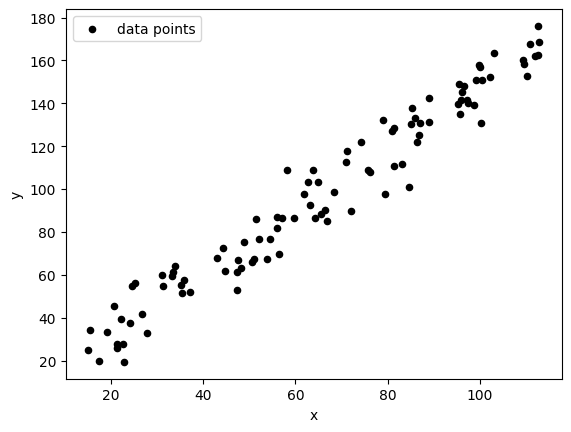

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf

x_var = []
y_var = []

for k in range(1, 100):
    x = k+15
    x_var.append(x + np.random.normal(loc=0.0, scale = 4.0))
    y_var.append(x*1.5 + np.random.normal(loc=0.0, scale = 6.0))

regr_data = pd.DataFrame(list(zip(x_var, y_var)), columns = ["x", "y"])
regr_data.plot(x='x', y='y', kind='scatter', color='black', label='data points')
plt.legend(loc='upper left')
plt.show()

In [3]:
# data frames have to be converted to numpy arrays to work with sklearn.  Sklearn is not fully adapted to Pandas can using DFs directly can cause errors
x = regr_data.iloc[:, 0].values.reshape(-1, 1)
y = regr_data.iloc[:, 1].values.reshape(-1, 1)
# the shape of the numpy array is a 99 row, 1 column array
print(x.shape)
print(y.shape)

(99, 1)
(99, 1)


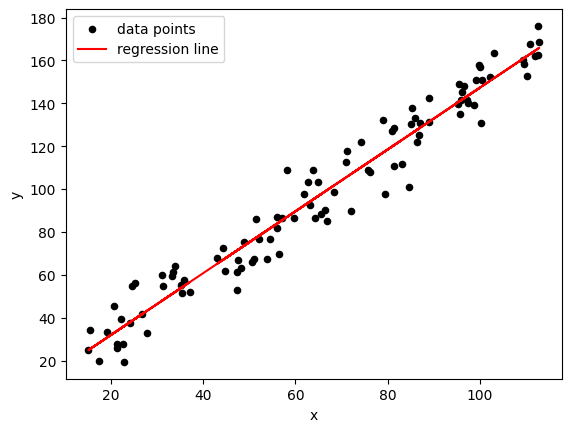

[3.19820276]
[[1.44066295]]


In [4]:
#scikit learn regression object
regr = linear_model.LinearRegression()
regr.fit(x, y)
regr_data['y_pred'] = regr.predict(x)

ax = regr_data.plot(x='x', y='y', kind='scatter', color='black', label='data points')
regr_data.plot(x='x', y='y_pred', kind='line', color='red', label='regression line', ax=ax)
plt.legend(loc='upper left')
plt.show()

print(regr.intercept_)
print(regr.coef_)

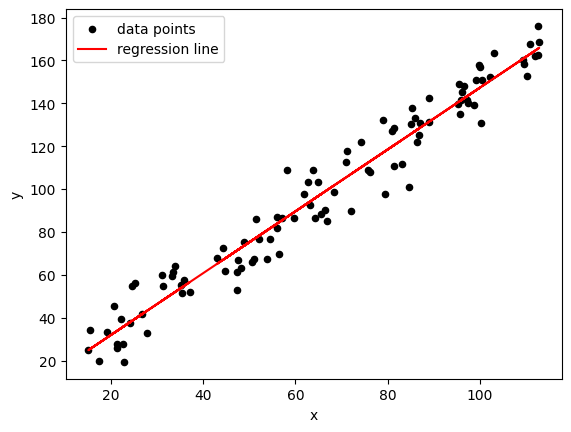

Intercept    3.198203
x            1.440663
dtype: float64


In [5]:
#stats model library.  OLS standard for ordinary least squares
regr_model = smf.ols(formula = 'y ~ x', data = regr_data).fit()
regr_data['y_pred2'] = regr_model.predict()

ax = regr_data.plot(x='x', y='y', kind='scatter', color='black', label='data points')
regr_data.plot(x='x', y='y_pred2', kind='line', color='red', label='regression line', ax=ax)
plt.legend(loc='upper left')
plt.show()

print(regr_model.params)

In [6]:
regr_data['residuals'] = regr_data['y'] - regr_data['y_pred2']
std_res = regr_data['residuals'].std()
regr_data['standardized_res'] = regr_data['residuals']/std_res
print(std_res)
print(regr_data)

9.211195729430875
             x           y      y_pred     y_pred2  residuals  \
0    22.844072   19.385239   36.108811   36.108811 -16.723572   
1    17.336168   20.045888   28.173777   28.173777  -8.127889   
2    15.049758   24.869513   24.879831   24.879831  -0.010319   
3    21.286025   27.654489   33.864190   33.864190  -6.209702   
4    15.479792   34.495627   25.499365   25.499365   8.996262   
..         ...         ...         ...         ...        ...   
94  103.044211  163.281911  151.650179  151.650179  11.631732   
95  112.911176  168.391343  165.865151  165.865151   2.526192   
96  112.722401  176.112012  165.593189  165.593189  10.518823   
97  112.731774  162.560633  165.606693  165.606693  -3.046060   
98  110.917606  167.788690  162.993088  162.993088   4.795602   

    standardized_res  
0          -1.815570  
1          -0.882392  
2          -0.001120  
3          -0.674147  
4           0.976666  
..               ...  
94          1.262782  
95          0.274

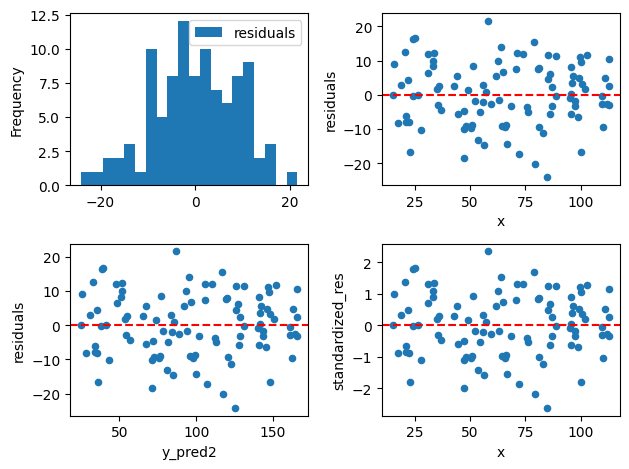

In [9]:
fig, ((hist1, res_x2), (res_y3, sres_x4)) = plt.subplots(2,2)
regr_data.plot(y='residuals', kind='hist', bins=20, ax=hist1)
regr_data.plot('x', 'residuals', kind='scatter', ax=res_x2)
res_x2.axhline(y=0.0, c='red', linestyle='dashed')
regr_data.plot('y_pred2', 'residuals', kind='scatter', ax=res_y3)
res_y3.axhline(y=0.0, c='red', linestyle='dashed')
regr_data.plot('x', 'standardized_res', kind='scatter', ax=sres_x4)
sres_x4.axhline(y=0.0, c='red', linestyle='dashed')
fig.tight_layout()
plt.show()

In [ ]:
#this is how the graphs should ideally look.  The residuals show a normal distribution
# additionally they show no discernable pattern and are evenly distributed around the center line
# redisuals, standardized residuals and y_pred looks essentially the same

In [11]:
print(regr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     1994.
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           1.72e-66
Time:                        18:41:15   Log-Likelihood:                -359.79
No. Observations:                  99   AIC:                             723.6
Df Residuals:                      97   BIC:                             728.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1982      2.307      1.387      0.1

In [ ]:
#r2 and adj r2 are close to 1 which shows pretty good coorelation.
#Durbin-watson is between 1.5-2.5 which is within acceptable range meaning theres no pattern to the residuals
#though the values a little low for engineered data but is likely attributable by the low amount of samples